# Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [21]:
x = np.linspace(-5, 10, 20)
y = 1.2 + 0.4 * x + 1.2 * np.sin(x) + 1.1 * np.cos(x) + np.random.randn(20)

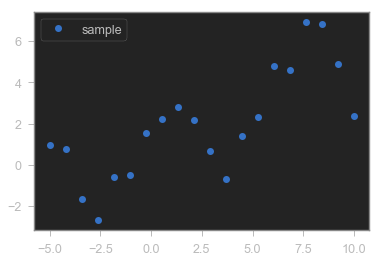

In [22]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o', label="sample")
ax.legend()

## Define OLS function

In [23]:
def ols(y, X):
    w = np.linalg.multi_dot([np.linalg.inv(np.dot(X.T, X)), X.T, y])
    return w

## Define $\mathbf{\phi}(\mathbf{x})$ function

In [32]:
def phi(x):
    def identity(x):
        return x
    
    def one(x):
        return np.ones(len(x))
    
    res = []
    phi_set = [one, identity, np.sin, np.cos]
    for func in phi_set:
        res.append(func(x))
        
    return np.array(res).T

In [43]:
Phi = phi(x)
w = ols(y, Phi)
w = w.reshape(-1, 1)

In [51]:
x_new = np.linspace(-5, 10, 100)
Phi_new = phi(x_new)
y_hat = np.ravel(np.dot(Phi_new, w))

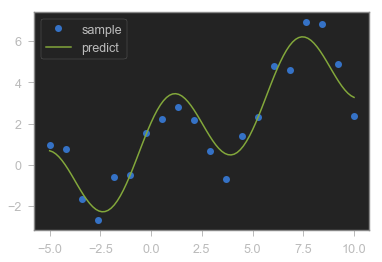

In [54]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o', label="sample")
ax.plot(x_new, y_hat, "-", label="predict")
ax.legend()